In [11]:
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data_utils
import matplotlib.pyplot as plt
import torch

import torchvision
import time

from models import VAE, IVAE, ConvolutionalDRAW
from train import train_geco, train_beta, train_geco_draw
from functions import sample_vae, marginal_KL, Compute_NLL
import datasets

In [7]:
def plot_gallery(images, h, w, n_row=3, n_col=6):
    plt.figure(figsize=(3 * n_col, 1.9 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray, vmin=-1, vmax=1, interpolation='nearest')
        plt.xticks(())
        plt.yticks(())

In [9]:
dataset = 'mnist'

if dataset == 'mnist':
    train_set = datasets.MNIST('./data/'+dataset+'/',  download=True, train=True, \
                                            transform=torchvision.transforms.ToTensor())
    test_set = datasets.MNIST('./data/'+dataset+'/',  download=True, train=False, \
                                            transform=torchvision.transforms.ToTensor())
    input_size = (28, 28)
    
elif dataset == 'cifar10':
    train_set = datasets.CIFAR10('./data/'+dataset+'/',  download=True, train=True, \
                                            transform=torchvision.transforms.ToTensor())
    test_set = datasets.CIFAR10('./data/'+dataset+'/',  download=True, train=False, \
                                            transform=torchvision.transforms.ToTensor())
    input_size = (32, 32)
else:
    train_set = datasets.CELEBA('./data/'+dataset+'/', train=True, \
                                            transform=torchvision.transforms.ToTensor())
    test_set = datasets.CELEBA('./data/'+dataset+'/',  train=False, \
                                            transform=torchvision.transforms.ToTensor())
    input_size = (218,178)
    
    
batch_size = 300
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, drop_last=True)

In [ ]:
vae_model_geco =  VAE(dims = [28*28, 512, 256], dim_latent = 200)

optimizer = optim.Adam(vae_model_geco.parameters(), lr=1e-3)
# scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=10, verbose=True)
scheduler = None
train_geco(vae_model_geco, optimizer, scheduler, 
           train_loader = train_loader, 
           valid_loader = test_loader, lbd_step = 100, 
           num_epochs=200,lambd_init = torch.FloatTensor([0.5]),
           tol = 4)

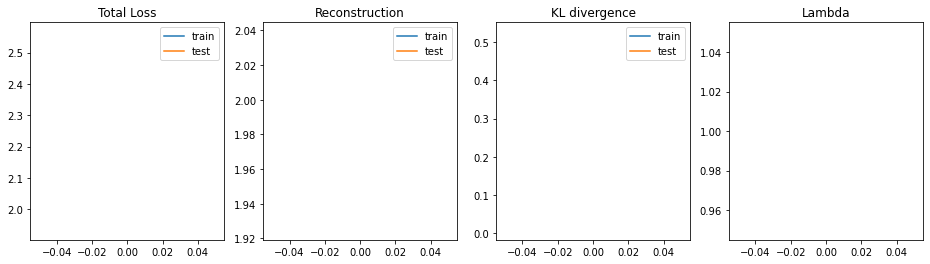

Epoch 1 of 100 took 1229.300s
  training loss (in-iteration): 	2.564809
  validation loss (in-iteration): 	1.934158


KeyboardInterrupt: 

In [13]:
cd_model = ConvolutionalDRAW(x_dim = 1, x_shape = input_size, h_dim = 256, T = 1)
optimizer = optim.Adam(cd_model.parameters(), lr=1e-3)
scheduler = None

train_geco_draw(cd_model, optimizer, scheduler, 
               train_loader = train_loader, 
               valid_loader = test_loader, 
                lbd_step = 100, 
               num_epochs=100, lambd_init = torch.FloatTensor([1]),
               tol = 0.6, pretrain = 0)